In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq
import math
from scipy.integrate import odeint

### Homework 1.4.1 - Shooting Method

By using shooting method, solve

$$
\frac{d^2 T}{d x^2} + \alpha (T_0 - T) = 0
$$

Where $\alpha = 5\times10^{-2}$, and $T_0 = 20$, subjected to $T(x=0) = 50$ and $T(x=10) = 200$

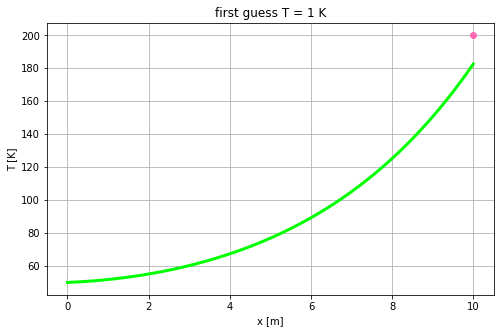

In [2]:
# given constants 
alpha = 5.0e-2
T_0 = 20

# initial conditions 
T = 50 
Td = 1 #guess

# boundary condition 
xf = 10
Tf = 200 # T = 200 when x = 10 

y_init = [T, Td] 

# rhs will have to return [Td, Tdd]

# the t in this case should be x pa ? Whatever 5555
def rhs(y,t):
    return [y[1], -alpha*(T_0 - y[0])]

t = np.arange(0,10,0.001)

Tsol = odeint(rhs, y_init, t)

# plt.figure(figsize = (8,5))
# plt.grid()
# plt.xlabel('x [m]')
# plt.ylabel('T [K]')
# plt.title('Shooting method with Td = 1')
# plt.plot(t,Tsol[:,0])
# plt.plot(10,200,'ro')

def plot_graph(title, y, t, yf, tf):
    # plot the solution
    plt.figure(figsize = (8,5))
    plt.grid()
    plt.plot(t, y[:, 0], color = 'lime', linewidth = 3)
    # plot the boundary at t_final
    plt.plot(xf, Tf, 'o', color = 'hotpink')
    plt.xlabel('x [m]')
    plt.ylabel('T [K]')
    plt.title(title)
    plt.show()
    
plot_graph(f'first guess T = {Td} K', odeint(rhs, y_init, t), t, xf, Tf)


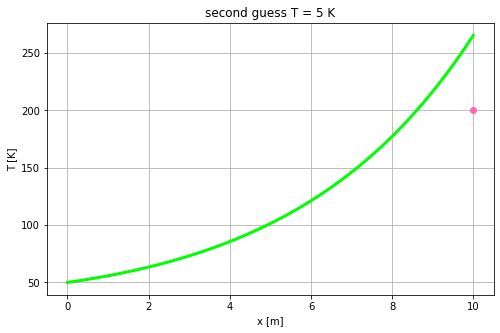

In [3]:
Td2 = 5
y_init2 = [T, Td2]

def plot_graph(title, y, t, yf, tf):
    # plot the solution
    plt.figure(figsize = (8,5))
    plt.grid()
    plt.plot(t, y[:, 0], color = 'lime', linewidth = 3)
    # plot the boundary at t_final
    plt.plot(xf, Tf, 'o', color = 'hotpink')
    plt.xlabel('x [m]')
    plt.ylabel('T [K]')
    plt.title(title)
    plt.show()
    
plot_graph(f'second guess T = {Td2} K', odeint(rhs, y_init2, t), t, xf, Tf)


Optimized temp using shooting method is T = 1.8416115207685262 K


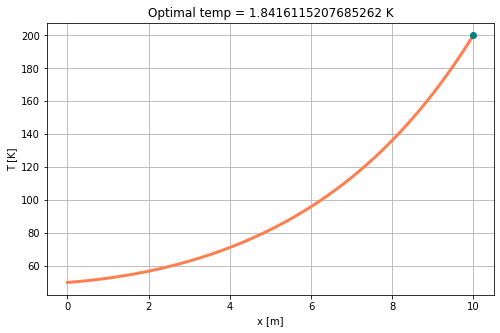

In [4]:
def objective_func(Td):
    sol = odeint(rhs, [T, Td], t)
    y_final = sol[-1, 0]
    return y_final - Tf

T0 = brentq(objective_func, 1, 5)
Tsol2 = odeint(rhs, [T, T0], t)
print(f'Optimized temp using shooting method is T = {T0} K')
plt.figure(figsize = (8,5))
plt.grid()
plt.xlabel('x [m]')
plt.ylabel('T [K]')
plt.title(f'Optimal temp = {T0} K')
plt.plot(t, Tsol2[:,0], color = 'coral', linewidth = 3)
plt.plot(10,200,'o', color = 'teal')


___
### Homework 1.4.2 - Finite Difference Method

Solve Homework 1.4.1 using finite difference method

### Thanks to Vicky (again 😂) for teaching me ไม่งั้นผมก็งมโข่งต่อไป 🥲

$$\begin{align}
\dfrac{d^2T}{dx^2} +\alpha(T_0 - T) &= 0\\
\dfrac{d^2T}{dx^2} &= -\alpha(T_0 - T)\\
\dfrac{y_{i-1} - 2y_i + y_{i+1}}{h^2} &= -\alpha(T_0 - T)\\
y_{i-1} - 2y_i + y_{i+1} &= -\alpha(y_0 - y_i)h^2\\
y_{i-1} - 2y_i - h^2\alpha y_i + y_{i+1} &= -\alpha h^2y_0\\
y_{i-1} +y_i(-2-h^2\alpha)+y_{i+1} &= -\alpha h^2y_0 
\end{align}
$$

The $(1, -2-h^2\alpha,1) $ part will go into the A matrix and the $-\alpha h^2y_0$ part will go to the b matrix 

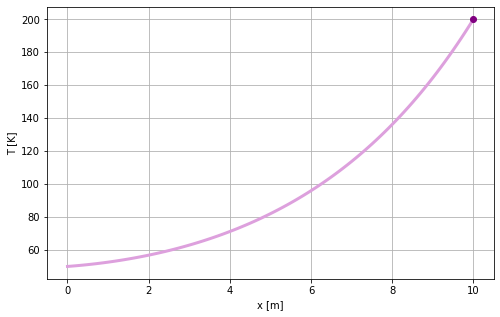

In [5]:
n = 100
h = (10-0) / n

# Get A
A = np.zeros((n+1, n+1))
A[0, 0] = 1
A[n, n] = 1
for i in range(1, n):
    A[i, i-1] = 1
    A[i, i] = -2-alpha*h**2
    A[i, i+1] = 1

# print(A)

# Get b
b = np.zeros(n+1)
b[0] = 50
b[1:-1] = -alpha*T_0*h**2
b[-1] = 200
# print(b)

# solve the linear equations A x = b
sol = np.linalg.solve(A, b)

x2 = np.linspace(0, 10, n + 1)

plt.figure(figsize = (8,5))
plt.grid()
plt.plot(x2, sol, linewidth = 3, color = 'plum')
plt.plot(10, 200, 'o', color = 'purple')
plt.xlabel('x [m]')
plt.ylabel('T [K]')
plt.show()